# Load data & details


## Load data 

In [1]:
# Import Modules 
import function_v1  #Func_sets(custom)
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 
import copy
import os


# Ignore warnings
warnings.filterwarnings('ignore')

# data load 
df = pd.read_csv("C:\\data\\train.csv")

pd.set_option('display.max_columns',20)  #column 출력개수 설정(자동생략 option off 기능)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## details

In [2]:
# Verify column and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# Check out class ratio:Label

print("<Label Class Ratio>")
df['Survived'].value_counts() / df.shape[0]

<Label Class Ratio>


0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [4]:
# Check out class ratio:X

print("<Column : Pclass> \n", df['Sex'].value_counts(), end='\n\n')
print("<Column : Name> \n", df['Name'].value_counts(), end='\n\n')
print("<Column : Sex> \n", df['Sex'].value_counts(), end='\n\n')
print("<Column : Age> \n", df['Age'].value_counts(), end='\n\n')
print("<Column : SibSp> \n", df['SibSp'].value_counts(), end='\n\n')
print("<Column : Parch> \n", df['Parch'].value_counts(), end='\n\n')
print("<Column : Ticket> \n", df['Ticket'].value_counts(), end='\n\n')
print("<Column : Fare> \n", df['Fare'].value_counts(), end='\n\n')
print("<Column : Embarked> \n", df['Embarked'].value_counts(), end='\n\n')
print("<Column : Cabin> \n", df['Cabin'].value_counts(), end='\n\n')

<Column : Pclass> 
 male      577
female    314
Name: Sex, dtype: int64

<Column : Name> 
 Hansen, Mr. Henrik Juul                           1
McDermott, Miss. Brigdet Delia                    1
Baclini, Mrs. Solomon (Latifa Qurban)             1
Spencer, Mrs. William Augustus (Marie Eugenie)    1
Fox, Mr. Stanley Hubert                           1
                                                 ..
Hassab, Mr. Hammad                                1
Kelly, Mrs. Florence "Fannie"                     1
Saalfeld, Mr. Adolphe                             1
Blackwell, Mr. Stephen Weart                      1
Ilett, Miss. Bertha                               1
Name: Name, Length: 891, dtype: int64

<Column : Sex> 
 male      577
female    314
Name: Sex, dtype: int64

<Column : Age> 
 24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64

<Column : SibSp> 
 0    608
1    209
2    

In [5]:
#Statistics (int columns)

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Verify null data

print("<Isnull>")
print(df.isnull().sum())
print('')
print("Total :", df.isnull().sum().sum())

<Isnull>
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Total : 866


# Pre-processing & Analysis

## Add derived variable 1

In [14]:
#Add Derived variables : child_women, fare55

mask1 = (df.Age<10) | (df.Sex=='female')
mask2 = (df.Fare>55)

df['child_women']=mask1.astype(int)
df['fare55']=mask2.astype(int)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,child_women,fare55
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0


## Add derived variable 2

In [15]:
#Extract name to column "Title" 

df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.')
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Countess      1
Mme           1
Ms            1
Jonkheer      1
Sir           1
Don           1
Lady          1
Capt          1
Name: Title, dtype: int64

In [16]:
#Transfer last name to MR, Miss, Mrs, Other(etc+Franch)

df['Title'] = df['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer', 'Lady','Major', 'Rev', 'Sir'], 'Other')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Master', 'Mr')
df['Title'].value_counts()

Mr       557
Miss     185
Mrs      126
Other     23
Name: Title, dtype: int64

## Add derived variable 3

In [17]:
#Grouping & create column (Age_mean)

df=function_v1.column_group(df, method="group_mean", c1="Title", c2="Age", c3="Age_mean")

In [18]:
#Check out current dataframe

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,child_women,fare55,Title,Age_mean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,Mr,30.062604
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,Mrs,35.788991
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,Miss,21.845638
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,Mrs,35.788991
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,Mr,30.062604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,Other,45.545455
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,Miss,21.845638
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0,Miss,21.845638
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0,Mr,30.062604


In [19]:
#Verify null data

print("<Isnull>")
print(df.isnull().sum())
print('')
print("Total :", df.isnull().sum().sum())

<Isnull>
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
child_women      0
fare55           0
Title            0
Age_mean         0
dtype: int64

Total : 866


## Replace NaN values

In [20]:
#Replace Nan values

df2 = function_v1.fillna_oto(df, method="oto", c1="Age", c2="Age_mean")
df2 = function_v1.fillna_str(df2, method="mode", c1="Embarked")
df2 = function_v1.fillna_str2(df2, value='N', c1="Cabin")
print(df2.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
child_women    0
fare55         0
Title          0
Age_mean       0
dtype: int64


## Analysis : Visualization

### Survivied-Title pie chart

In [21]:
#Pie chart Function

def survived_crosstab(dataframe, c="default"):
    '''col_name과 Survived간의 교차도표 생성'''
    df=copy.deepcopy(dataframe)
    feature_survived = pd.crosstab(df[c], df['Survived'])
    feature_survived.columns = feature_survived.columns.map({0:"Dead", 1:"Alive"})
    return feature_survived


def pie_chart(feature_survived):
    '''
    pie_chart 생성
    pcol, prow = 차트를 출력할 개수. pcol * prow 만큼의 차트 출력 
    '''
    frows, fcols = feature_survived.shape
    pcol = 4
    prow = (frows/pcol + frows%pcol)
    plot_height = prow * 2.5
    plt.figure(figsize=(14, plot_height))

    for row in range(0, frows):
        plt.subplot(prow, pcol, row+1)

        index_name = feature_survived.index[row]
        plt.pie(feature_survived.loc[index_name], labels=feature_survived.loc[index_name].index, autopct='%1.1f%%')
        plt.title("{0}' survived".format(index_name))

    plt.show()
    

def show_pie_chart(dataframe, c2="default"):
    df=copy.deepcopy(dataframe)
    colname_survived = survived_crosstab(df, c=c2)
    pie_chart(colname_survived)
    return colname_survived

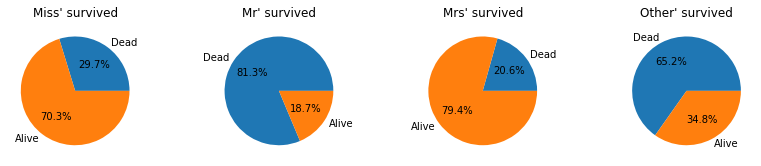

Survived,Dead,Alive
Title,,
Miss,55,130
Mr,453,104
Mrs,26,100
Other,15,8


In [22]:
c = show_pie_chart(df, 'Title')
c

### Correlation 

<AxesSubplot:>

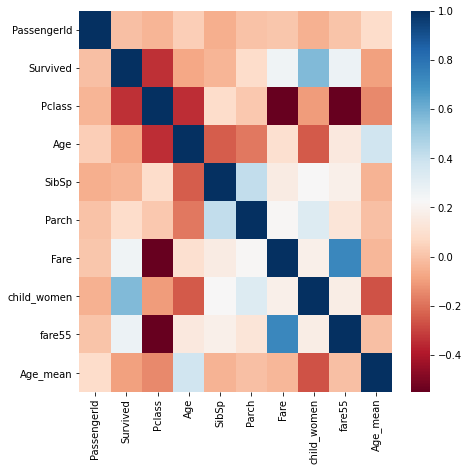

In [23]:
#int type varibale only

plt.figure(figsize=(7,7))
corr=df2.corr()
sns.heatmap(corr, cmap='RdBu')

### Boxplot : Fare

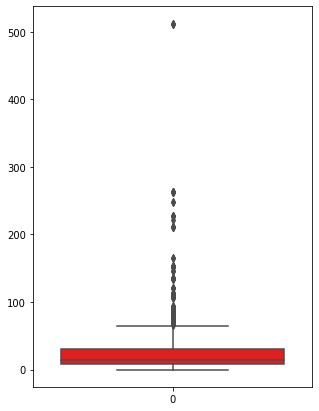

In [24]:
plt.figure(figsize=(5,7))
sns.boxplot(data=df2['Fare'], color='red')
plt.show()

### Survived-Pclass&Sex Bar chart 

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

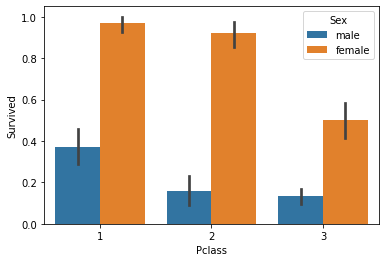

In [25]:
# import module
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pclass ~ Survived
#sns.barplot(x='Sex', y='Survived', data=df_2)
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df2)

### Survived-Age Bar chart

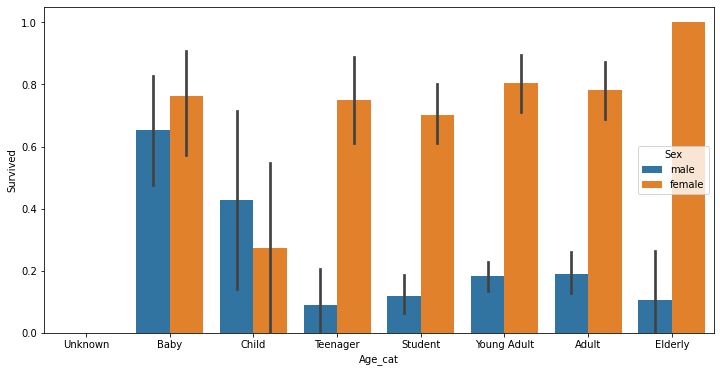

In [26]:
# Convert continuous variable to categorical(Age)

def get_category(age):
    cat = ''
    if age <= -1 : cat='Unknown'
    elif age <= 5: cat='Baby'
    elif age <= 12: cat='Child'
    elif age <= 18: cat='Teenager'
    elif age <= 25: cat='Student'
    elif age <= 35: cat='Young Adult'
    elif age <= 60: cat='Adult'
    else: cat='Elderly'
        
    return cat

plt.figure(figsize=(12,6))
group_names=['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

df2['Age_cat'] = df2['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=df2, order=group_names)
df2.drop('Age_cat', axis=1, inplace=True)

## Drop features

In [27]:
df3 = function_v1.drop_features(df2, c1="PassengerId", c2="Name", c3="Ticket", c4="Cabin")
df3

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,child_women,fare55,Title,Age_mean
0,0,3,male,22.0,1,0,7.2500,S,0,0,Mr,30.062604
1,1,1,female,38.0,1,0,71.2833,C,1,1,Mrs,35.788991
2,1,3,female,26.0,0,0,7.9250,S,1,0,Miss,21.845638
3,1,1,female,35.0,1,0,53.1000,S,1,0,Mrs,35.788991
4,0,3,male,35.0,0,0,8.0500,S,0,0,Mr,30.062604
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0,0,Other,45.545455
887,1,1,female,19.0,0,0,30.0000,S,1,0,Miss,21.845638
888,0,3,female,22.0,1,2,23.4500,S,1,0,Miss,21.845638
889,1,1,male,26.0,0,0,30.0000,C,0,0,Mr,30.062604


## Get outlier & Replace

In [28]:
df4 = function_v1.transform_outlier(dataframe=df3, method="both", column="Fare", weight=6)

<Outliers>
highest_standard : 169.5376
lowest_standard : -130.6272

Count of outlier values : 20
27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: Fare, dtype: float64


In [29]:
# Checkout outlier
function_v1.transform_outlier(dataframe=df4, method="both", column="Fare", weight=6)

<Outliers>
highest_standard : 169.5376
lowest_standard : -130.6272

Count of outlier values : 0
Series([], Name: Fare, dtype: float64)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,child_women,fare55,Title,Age_mean
0,0,3,male,22.0,1,0,7.2500,S,0,0,Mr,30.062604
1,1,1,female,38.0,1,0,71.2833,C,1,1,Mrs,35.788991
2,1,3,female,26.0,0,0,7.9250,S,1,0,Miss,21.845638
3,1,1,female,35.0,1,0,53.1000,S,1,0,Mrs,35.788991
4,0,3,male,35.0,0,0,8.0500,S,0,0,Mr,30.062604
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0,0,Other,45.545455
887,1,1,female,19.0,0,0,30.0000,S,1,0,Miss,21.845638
888,0,3,female,22.0,1,2,23.4500,S,1,0,Miss,21.845638
889,1,1,male,26.0,0,0,30.0000,C,0,0,Mr,30.062604


## Get_dummy

In [31]:
# Create dummy column 
df5 = copy.deepcopy(df4)
df5 = pd.get_dummies(df5, drop_first=True)  #drop_first help modeling better**
df5

,Survived,Pclass,Age,SibSp,Parch,Fare,child_women,fare55,Age_mean,Sex_male,Embarked_Q,Embarked_S,Title_Mr,Title_Mrs,Title_Other
0,0,3,22.0,1,0,7.2500,0,0,30.062604,1,0,1,1,0,0
1,1,1,38.0,1,0,71.2833,1,1,35.788991,0,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,1,0,21.845638,0,0,1,0,0,0
3,1,1,35.0,1,0,53.1000,1,0,35.788991,0,0,1,0,1,0
4,0,3,35.0,0,0,8.0500,0,0,30.062604,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0,45.545455,1,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,21.845638,0,0,1,0,0,0
888,0,3,22.0,1,2,23.4500,1,0,21.845638,0,0,1,0,0,0
889,1,1,26.0,0,0,30.0000,0,0,30.062604,1,0,0,1,0,0


## Create X, y & Standardization

In [32]:
# Devide feature & label

from sklearn import preprocessing
y_df = df5['Survived']
X_df = df5.drop('Survived', axis=1)
X_df = preprocessing.StandardScaler().fit(X_df).transform(X_df)
X_df

array([[ 0.82737724, -0.57654444,  0.43279337, ...,  0.77436486,
        -0.40583972, -0.16278113],
       [-1.56610693,  0.64235075,  0.43279337, ..., -1.29138092,
         2.4640269 , -0.16278113],
       [ 0.82737724, -0.27182064, -0.4745452 , ..., -1.29138092,
        -0.40583972, -0.16278113],
       ...,
       [ 0.82737724, -0.57654444,  0.43279337, ..., -1.29138092,
        -0.40583972, -0.16278113],
       [-1.56610693, -0.27182064, -0.4745452 , ...,  0.77436486,
        -0.40583972, -0.16278113],
       [ 0.82737724,  0.18526506, -0.4745452 , ...,  0.77436486,
        -0.40583972, -0.16278113]])

# Training

## Validation

In [33]:
# Devide trainset:testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=0)

# Verify label ratio 
train_cnt = y_train.count()
test_cnt = y_test.count()

print('trainset :', X_train.shape)
print('testset :',X_test.shape, end='\n\n')

print("trainset label ratio")
print(y_train.value_counts()/train_cnt, end='\n\n')

print("testset label ratio")
print(y_test.value_counts()/test_cnt)

trainset : (712, 14)
testset : (179, 14)

trainset label ratio
0    0.616573
1    0.383427
Name: Survived, dtype: float64

testset label ratio
0    0.614525
1    0.385475
Name: Survived, dtype: float64


## import XGBoost

In [35]:
# import module 
import xgboost as xgb
from xgboost import XGBClassifier

# verify xgboost version
print(xgb.__version__)  #1.3.3

1.4.2


## Training with non-gridsearch

In [36]:
## Models

# Import module
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

# Make object : classifier
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()


#DecisionTree
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('dt_Acc : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('dt_roc_auc : {0:.4f}'.format(roc_auc_score(y_test, dt_clf.predict_proba(X_test)[:,1])))
print('')


#RandomForest
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('rf_Acc : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('rf_roc_auc : {0:.4f}'.format(roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1])))
print('')


#LogisticRegression
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('lr_Acc : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('lr_roc_auc : {0:.4f}'.format(roc_auc_score(y_test, lr_clf.predict_proba(X_test)[:,1])))
print('')


##XGBoost
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(n_estimators=100)
xgb_clf.fit(X_train, y_train)
           
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
xgb_acc_score = accuracy_score(y_test, xgb_clf.predict(X_test))
print('')
print('xgb_Acc : {0:.4f}'.format(xgb_acc_score))
print('xgb_roc_auc : {0:.4f}'.format(xgb_roc_score))

dt_Acc : 0.7709
dt_roc_auc : 0.7518

rf_Acc : 0.8380
rf_roc_auc : 0.8751

lr_Acc : 0.8156
lr_roc_auc : 0.8947

[16:39:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

xgb_Acc : 0.8324
xgb_roc_auc : 0.8669


In [37]:
xgb_clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Get Feature importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

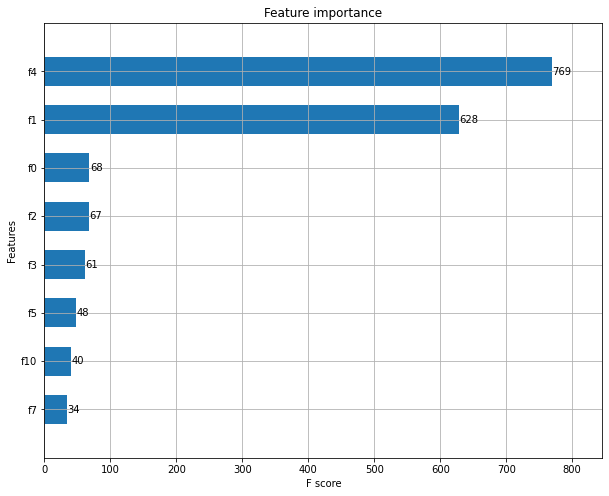

In [38]:
# Feature importance = visualization

from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=8, height=0.6)

#There is a issue that yticks's column name is replaced like f4, f1, f0...
#The number located rightside of 'f', means column number of dataframe(X_df)

## GridSearch : MLP Classifier

In [39]:
from sklearn.neural_network  import  MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': [
             (1,2),(2,2),(3,2),(4,2),(5,2),(6,2),(7,2),(8,2),(9,2),(10,2),(11,2), (12,2),(13,2),(14,2),(15,2),(16,2),(17,2),(18,2),(19,2),(20,2),(21,2)
             ]
        }
       ]
 
grid_dtree = GridSearchCV(MLPClassifier(), param_grid, cv=3, n_jobs = -1, verbose = 2 )

grid_dtree.fit(X_df, y_df)

Fitting 3 folds for each of 252 candidates, totalling 756 fits


GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid=[{'activation': ['identity', 'logistic', 'tanh',
                                         'relu'],
                          'hidden_layer_sizes': [(1, 2), (2, 2), (3, 2), (4, 2),
                                                 (5, 2), (6, 2), (7, 2), (8, 2),
                                                 (9, 2), (10, 2), (11, 2),
                                                 (12, 2), (13, 2), (14, 2),
                                                 (15, 2), (16, 2), (17, 2),
                                                 (18, 2), (19, 2), (20, 2),
                                                 (21, 2)],
                          'solver': ['lbfgs', 'sgd', 'adam']}],
             verbose=2)

In [40]:
#Result

print('Best score :', grid_dtree.best_score_, end='\n\n')
print('Best parameters :')
grid_dtree.best_params_

Best score : 0.8226711560044894

Best parameters :


{'activation': 'tanh', 'hidden_layer_sizes': (1, 2), 'solver': 'lbfgs'}

In [41]:
#Result details

res1 = pd.DataFrame(grid_dtree.cv_results_)
res1.sort_values(by=['rank_test_score'], inplace=True)
res1[['params', 'mean_test_score', 'rank_test_score']].head()

,params,mean_test_score,rank_test_score
126,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.822671,1
245,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.818182,2
215,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.815937,3
188,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.815937,4
52,"{'activation': 'identity', 'hidden_layer_sizes...",0.814815,5


## GridSearch : XGBoost

In [42]:
#Import modules 
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


params = {#general params
          'booster':['gbtree'],  #default=gbtree, other:gblinear
          'silent':[0],  #default=0, other:1(=silent)    
          
          #Booster params
          'learning_rate':[0.1, 0.05, 0.01],  #default=0.1
          'n_estimators':[100,150,200,500],  #default=100
          'min_child_weight':[1,2],  #default=1
          'min_split_loss':[0,10,50],  #default=0  #gamma
          'max_depth':[3,4,5],  #default=3
          'subsample':[1],  #default=1
          'colsample_bytree':[0.8,1],  #default=1
          'reg_lamda':[1],  #default=1
          'reg_alpha':[0],  #default=0
          'scale_pos_weight':[1],  #default=1
    
          #Training task params    
          'objective':['binary:logistic'],  #default=logistic, other:index top
          'eval_metric':['error']  #default=rmse|error  #ohter : mae, logloss, merror, mlogloss
          }


xgb_clf_t = XGBClassifier()

xgb_grid = GridSearchCV(xgb_clf_t, 
                        param_grid=params, 
                        cv=5, 
                        scoring='accuracy',  #default=accuracy  #options : roc_auc, f1
                        refit=True,
                        n_jobs=-1, 
                        verbose=2
                       )

xgb_grid.fit(X_df, y_df)


## [Early stopping code]
# gridcv.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',
#           eval_set=[(X_train, y_train), (X_test, y_test)])

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[16:44:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "reg_lamda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
             param_grid={'booster': ['gbtree'], 'colsample_bytree': [0.8, 1],
                         'eval_metric': ['error'],
                         'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 2],
                

In [43]:
#Result

print('Best score :', xgb_grid.best_score_, end='\n\n')
print('Best parameters :')
xgb_grid.best_params_

Best score : 0.8406440273680247

Best parameters :


{'booster': 'gbtree',
 'colsample_bytree': 0.8,
 'eval_metric': 'error',
 'learning_rate': 0.05,
 'max_depth': 5,
 'min_child_weight': 2,
 'min_split_loss': 0,
 'n_estimators': 100,
 'objective': 'binary:logistic',
 'reg_alpha': 0,
 'reg_lamda': 1,
 'scale_pos_weight': 1,
 'silent': 0,
 'subsample': 1}

In [44]:
#Result details

cv_res_df = pd.DataFrame(xgb_grid.cv_results_)
cv_res_df.sort_values(by=['rank_test_score'], inplace=True)
cv_res_df[['params', 'mean_test_score', 'rank_test_score']].head()

,params,mean_test_score,rank_test_score
132,"{'booster': 'gbtree', 'colsample_bytree': 0.8,...",0.840644,1
277,"{'booster': 'gbtree', 'colsample_bytree': 1, '...",0.839527,2
37,"{'booster': 'gbtree', 'colsample_bytree': 0.8,...",0.839514,3
26,"{'booster': 'gbtree', 'colsample_bytree': 0.8,...",0.838416,4
133,"{'booster': 'gbtree', 'colsample_bytree': 0.8,...",0.838397,5


## GridSearch : Random Forest

In [45]:
# Import module
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


params = {
        'n_estimators':[50,100,150],
        'max_depth':[3,4,5],
        'min_samples_leaf':[3,4,5],
        'min_samples_split':[2,3,4]
        }

rf_clf_cv = RandomForestClassifier(n_jobs=-1)
grid_rf = GridSearchCV(rf_clf_cv, param_grid=params, cv=7, n_jobs=-1, verbose = 2 )
grid_rf.fit(X_df, y_df)

Fitting 7 folds for each of 81 candidates, totalling 567 fits


GridSearchCV(cv=7, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [46]:
#Result

print('Best score :', grid_rf.best_score_, end='\n\n')
print('Best parameters :')
grid_rf.best_params_

Best score : 0.8282919713160855

Best parameters :


{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 50}

In [47]:
#Result details

res1 = pd.DataFrame(grid_rf.cv_results_)
res1.sort_values(by=['rank_test_score'], inplace=True)
res1[['params', 'mean_test_score', 'rank_test_score']].head()

,params,mean_test_score,rank_test_score
54,"{'max_depth': 5, 'min_samples_leaf': 3, 'min_s...",0.828292,1
68,"{'max_depth': 5, 'min_samples_leaf': 4, 'min_s...",0.828283,2
55,"{'max_depth': 5, 'min_samples_leaf': 3, 'min_s...",0.826060,3
57,"{'max_depth': 5, 'min_samples_leaf': 3, 'min_s...",0.826060,3
59,"{'max_depth': 5, 'min_samples_leaf': 3, 'min_s...",0.826060,3


# Prepare Testset

## Load data

In [48]:
# data load 
#df_test = pd.read_csv("C:\\Users\\icecr\\OneDrive\\CSV_file\\titanic\\test.csv")
df_test = pd.read_csv("C:\\data\\test.csv")  #for notebook

pd.set_option('display.max_rows',50)  #row 출력개수 설정(자동생략 option off 기능)
pd.set_option('display.max_columns',20)  #column 출력개수 설정(자동생략 option off 기능)
df_test[1:20]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S


## details

In [49]:
# Verify column and types
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [34]:
# # Value count : X
# print("<Column : Pclass> \n", df_test['Sex'].value_counts(), end='\n\n')
# print("<Column : Name> \n", df_test['Name'].value_counts(), end='\n\n')
# print("<Column : Sex> \n", df_test['Sex'].value_counts(), end='\n\n')
# print("<Column : Age> \n", df_test['Age'].value_counts(), end='\n\n')
# print("<Column : SibSp> \n", df_test['SibSp'].value_counts(), end='\n\n')
# print("<Column : Parch> \n", df_test['Parch'].value_counts(), end='\n\n')
# print("<Column : Ticket> \n", df_test['Ticket'].value_counts(), end='\n\n')
# print("<Column : Fare> \n", df_test['Fare'].value_counts(), end='\n\n')
# print("<Column : Embarked> \n", df_test['Embarked'].value_counts(), end='\n\n')
# print("<Column : Cabin> \n", df_test['Cabin'].value_counts(), end='\n\n')

In [50]:
#Statistics (int columns)

df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [51]:
# Verify null data
print("<Isnull>")
print(df_test.isnull().sum())
print('')
print("Total :", df_test.isnull().sum().sum())

<Isnull>
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Total : 414


# Testset : Pre-processing

## Add derived variable 1

In [52]:
#Add Derived variables : child_women, fare55

mask1 = (df_test.Age<10) | (df_test.Sex=='female')
mask2 = (df_test.Fare>55)

df_test['child_women']=mask1.astype(int)
df_test['fare55']=mask2.astype(int)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,child_women,fare55
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0


## Add derived variable 2

In [53]:
#Extract name to column "Title" 

df_test['Title'] = df_test.Name.str.extract(' ([A-Za-z]+)\.')
df_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [54]:
#Transfer last name to MR, Miss, Mrs, Other(etc+Franch)

df_test['Title'] = df_test['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer', 'Lady','Major', 'Rev', 'Sir'], 'Other')
df_test['Title'] = df_test['Title'].replace('Mlle', 'Miss')
df_test['Title'] = df_test['Title'].replace('Mme', 'Mrs')
df_test['Title'] = df_test['Title'].replace('Ms', 'Miss')   
df_test['Title'] = df_test['Title'].replace('Master', 'Mr')
df_test['Title'].value_counts()

Mr       261
Miss      79
Mrs       72
Other      6
Name: Title, dtype: int64

## Add derived variable 3

In [55]:
#Grouping & create column (Age_mean)

df_test=function_v1.column_group(df_test, method="group_mean", c1="Title", c2="Age", c3="Age_mean")

In [56]:
#Check out current dataframe

df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,child_women,fare55,Title,Age_mean
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,Mr,29.909550
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,Mrs,38.903226
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0,Mr,29.909550
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,Mr,29.909550
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0,Mrs,38.903226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0,Mr,29.909550
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,1,Other,43.833333
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,Mr,29.909550
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0,Mr,29.909550


In [57]:
#Verify null data

print("<Isnull>")
print(df_test.isnull().sum())
print('')
print("Total :", df_test.isnull().sum().sum())

<Isnull>
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
child_women      0
fare55           0
Title            0
Age_mean         0
dtype: int64

Total : 414


## Replace NaN values

In [58]:
#Replace Nan values
df_test = function_v1.fillna_int(df_test, method="mean", c1="Fare")
df_test = function_v1.fillna_oto(df_test, method="oto", c1="Age", c2="Age_mean")
df_test = function_v1.fillna_str2(df_test, value='N', c1="Cabin")
print(df_test.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
child_women    0
fare55         0
Title          0
Age_mean       0
dtype: int64


## Analysis : Visualization

In [44]:
#skip

## Drop features

In [59]:
# Save id data for submission
test_id = df_test.PassengerId

In [60]:
df_test = function_v1.drop_features(df_test, c1="PassengerId", c2="Name", c3="Ticket", c4="Cabin")
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,child_women,fare55,Title,Age_mean
0,3,male,34.5,0,0,7.8292,Q,0,0,Mr,29.909550
1,3,female,47.0,1,0,7.0000,S,1,0,Mrs,38.903226
2,2,male,62.0,0,0,9.6875,Q,0,0,Mr,29.909550
3,3,male,27.0,0,0,8.6625,S,0,0,Mr,29.909550
4,3,female,22.0,1,1,12.2875,S,1,0,Mrs,38.903226
...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,30.0,0,0,8.0500,S,0,0,Mr,29.909550
414,1,female,39.0,0,0,108.9000,C,1,1,Other,43.833333
415,3,male,38.5,0,0,7.2500,S,0,0,Mr,29.909550
416,3,male,30.0,0,0,8.0500,S,0,0,Mr,29.909550


## Get outlier & Replace

In [61]:
df_test = function_v1.transform_outlier(dataframe=df_test, method="both", column="Fare", weight=6)

<Outliers>
highest_standard : 173.1252
lowest_standard : -133.7294

Count of outlier values : 18
24     262.3750
53     263.0000
59     262.3750
64     262.3750
69     263.0000
74     211.5000
75     211.5000
81     221.7792
114    221.7792
142    262.3750
156    221.7792
184    247.5208
202    227.5250
218    211.5000
324    211.3375
343    512.3292
375    262.3750
407    211.5000
Name: Fare, dtype: float64


In [62]:
# Checkout outlier
function_v1.transform_outlier(dataframe=df_test, method="both", column="Fare", weight=6)

<Outliers>
highest_standard : 173.1252
lowest_standard : -133.7294

Count of outlier values : 0
Series([], Name: Fare, dtype: float64)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,child_women,fare55,Title,Age_mean
0,3,male,34.5,0,0,7.8292,Q,0,0,Mr,29.909550
1,3,female,47.0,1,0,7.0000,S,1,0,Mrs,38.903226
2,2,male,62.0,0,0,9.6875,Q,0,0,Mr,29.909550
3,3,male,27.0,0,0,8.6625,S,0,0,Mr,29.909550
4,3,female,22.0,1,1,12.2875,S,1,0,Mrs,38.903226
...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,30.0,0,0,8.0500,S,0,0,Mr,29.909550
414,1,female,39.0,0,0,108.9000,C,1,1,Other,43.833333
415,3,male,38.5,0,0,7.2500,S,0,0,Mr,29.909550
416,3,male,30.0,0,0,8.0500,S,0,0,Mr,29.909550


## Get_dummy

In [63]:
# Create dummy column 
df_test = copy.deepcopy(df_test)
df_test = pd.get_dummies(df_test, drop_first=True)  #drop_first help modeling better**
df_test

,Pclass,Age,SibSp,Parch,Fare,child_women,fare55,Age_mean,Sex_male,Embarked_Q,Embarked_S,Title_Mr,Title_Mrs,Title_Other
0,3,34.5,0,0,7.8292,0,0,29.909550,1,1,0,1,0,0
1,3,47.0,1,0,7.0000,1,0,38.903226,0,0,1,0,1,0
2,2,62.0,0,0,9.6875,0,0,29.909550,1,1,0,1,0,0
3,3,27.0,0,0,8.6625,0,0,29.909550,1,0,1,1,0,0
4,3,22.0,1,1,12.2875,1,0,38.903226,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,30.0,0,0,8.0500,0,0,29.909550,1,0,1,1,0,0
414,1,39.0,0,0,108.9000,1,1,43.833333,0,0,0,0,0,1
415,3,38.5,0,0,7.2500,0,0,29.909550,1,0,1,1,0,0
416,3,30.0,0,0,8.0500,0,0,29.909550,1,0,1,1,0,0


## Create X, y & Standardization

In [64]:
# Devide feature & label
from sklearn import preprocessing

X_df_test = preprocessing.StandardScaler().fit(df_test).transform(df_test)
X_df_test

array([[ 0.87348191,  0.34058554, -0.49947002, ...,  0.77558531,
        -0.45617155, -0.1206777 ],
       [ 0.87348191,  1.3180969 ,  0.61699237, ..., -1.28934882,
         2.19215774, -0.1206777 ],
       [-0.31581919,  2.49111053, -0.49947002, ...,  0.77558531,
        -0.45617155, -0.1206777 ],
       ...,
       [ 0.87348191,  0.65338917, -0.49947002, ...,  0.77558531,
        -0.45617155, -0.1206777 ],
       [ 0.87348191, -0.01131855, -0.49947002, ...,  0.77558531,
        -0.45617155, -0.1206777 ],
       [ 0.87348191, -0.01131855,  0.61699237, ...,  0.77558531,
        -0.45617155, -0.1206777 ]])

# Predict

## Predict test_data with trained model

In [65]:
y_hat = grid_rf.predict(X_df_test)  
#y_hat = grid_dtree.predict(X_df_test)  
print(len(y_hat))

418


## Create submission file

In [67]:
#Save submission in local path

submission = pd.DataFrame({'PassengerId':test_id, 'Survived':y_hat})
submission.to_csv("C:\\Users\\KJM\\Desktop\\kaggle\\Sub001.csv", index=False)
#submission.to_csv("C:\\Users\\82103\\Desktop\\downloads\\Sub001.csv", index=False) #For notebook

In [68]:
#Log

print(y_hat)
for  i,a  in  enumerate(y_hat):
    print (str(i+892) + ',' + str(a), end='\t')

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
892,0	893,1	894,0	895,0	896,1	897,0	898,1	899,0	900,1	901,0	902,0	903,0	904,1	905,0	906,1	907,1	908,0	909,0	910,0	911,1	912,0	913,1	914,1	915,0	916,1	9